In [10]:
import pandas as pd
import numpy as np
import random
from scipy.stats import dirichlet

import math
import matplotlib.pyplot as plt

import seaborn as sns



In [11]:
file_path = '/Users/saharawaji/Documents/GitHub/Research/loan_sanction_test.csv'
df = pd.read_csv(file_path)

class Agent:
    def __init__(self, agent_type, income):
        self.type = agent_type
        self.income = income  
        
def initialize_grid2(df, grid_size):

    grid = np.empty((grid_size, grid_size), dtype=object)
    total_cells = grid_size * grid_size
    num_empty_cells = int(total_cells * 0.1)
    
    # Set specific number of each agent type
    num_type_0 = num_type_1 = 45
    
    empty_cells = random.sample(range(total_cells), num_empty_cells)

    # Get incomes directly from the dataset, without shuffling
    incomes = df['ApplicantIncome'].values

    index = 0
    type_0_added = type_1_added = 0

    for i in range(grid_size):
        for j in range(grid_size):
            pos = i * grid_size + j
            if pos not in empty_cells:
                # Extract demographic data for each agent
                gender = 0 if df.loc[index, 'Gender'] == 'Male' else 1
                married = 0 if df.loc[index, 'Married'] == 'No' else 1
                education = 0 if df.loc[index, 'Education'] == 'Not Graduate' else 1

                # Assign agent type based on count
                if gender == 0 and married == 1 and education == 1 and type_0_added < num_type_0:
                    agent_type = 0
                    type_0_added += 1
                elif type_1_added < num_type_1:
                    agent_type = 1
                    type_1_added += 1
                else:
                    continue  # Skip the cell if both type counts are met

                # Assign income
                income = incomes[index]
                index += 1
                if index >= len(incomes):
                    index = 0  # Reset index if it exceeds the length of the incomes list

                # Create Agent object
                grid[i, j] = Agent(agent_type, income)
            else:
                grid[i, j] = None

    return grid


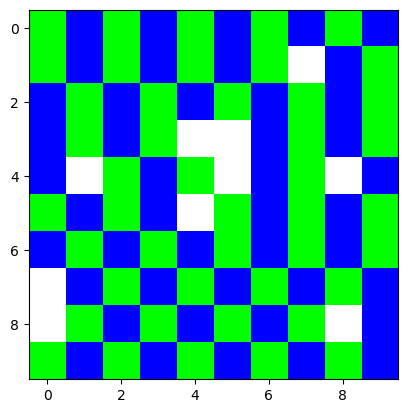

Number of Type 0 Agents: 45
Number of Type 1 Agents: 45


In [12]:
file_path = '/Users/saharawaji/Documents/GitHub/Research/loan_sanction_test.csv'
df = pd.read_csv(file_path)

class Agent:
    def __init__(self, agent_type, income):
        self.type = agent_type
        self.income = income  
        
def initialize_grid(df, grid_size):
    
    
    grid = np.empty((grid_size, grid_size), dtype=object)
    total_cells = grid_size * grid_size
    num_empty_cells = int(total_cells * 0.1)
    
    # Set specific number of each agent type
    num_type_0 = num_type_1 = 45
    
    empty_cells = random.sample(range(total_cells), num_empty_cells)

    # Get incomes directly from the dataset, without shuffling
    incomes = df['ApplicantIncome'].values

    index = 0
    type_0_added = type_1_added = 0

    for i in range(grid_size):
        for j in range(grid_size):
            pos = i * grid_size + j
            if pos not in empty_cells:
                # Extract demographic data for each agent
                gender = 0 if df.loc[index, 'Gender'] == 'Male' else 1
                married = 0 if df.loc[index, 'Married'] == 'No' else 1
                education = 0 if df.loc[index, 'Education'] == 'Not Graduate' else 1
    
            # New criteria for type selection
                agent_type = 0 if index % 2 == 0 else 1  # Example adjustment

                if (agent_type == 0 and type_0_added < num_type_0) or (agent_type == 1 and type_1_added < num_type_1):
                    if agent_type == 0:
                        type_0_added += 1
                    else:
                        type_1_added += 1
                else:
                    continue  # Skip the cell if both type counts are met

                income = incomes[index % len(incomes)]
                index += 1

                grid[i, j] = Agent(agent_type, income)
            else:
                grid[i, j] = None

    return grid    
    
    
    



# Additional code for visualization and counting agent types remains the same


def assign_colors(cell):
    if cell is None:  # Adjusting for Agent object
        return (0, 0, 0, 0)  # Transparent for empty cell
    if cell.type == 0:
        return (0, 1, 0, 1)  # Green for type one
    else:
        return (0, 0, 1, 1)  # Blue for type two


# Initialize the grid
grid_size = 10 
grid = initialize_grid(df, grid_size)

# Assign colors and visualize the grid
color_grid = np.empty((grid_size, grid_size, 4), dtype=float)
for i in range(grid_size):
    for j in range(grid_size):
        color_grid[i, j] = assign_colors(grid[i, j])



def grid_to_list(grid):
    grid_list = []
    for row in grid:
        row_list = []
        for cell in row:
            if cell is None:
                row_list.append("Empty")
            else:
                row_list.append(f"Agent(Type: {cell.type}, Income: {cell.income})")
        grid_list.append(row_list)
    return grid_list

# Convert the grid to a list format
grid_list = grid_to_list(grid)
#print(grid_list)
#print(grid)
# Visualizing the grid using matplotlib
plt.imshow(color_grid)
plt.savefig('color_grid.png')
plt.show()
def count_agent_types(grid):
    count_type_0 = 0
    count_type_1 = 0

    for row in grid:
        for cell in row:
            if cell is not None:
                if cell.type == 0:
                    count_type_0 += 1
                elif cell.type == 1:
                    count_type_1 += 1

    return count_type_0, count_type_1

# Using the function to count agents of each type in the grid
count_type_0, count_type_1 = count_agent_types(grid)

print(f"Number of Type 0 Agents: {count_type_0}")
print(f"Number of Type 1 Agents: {count_type_1}")



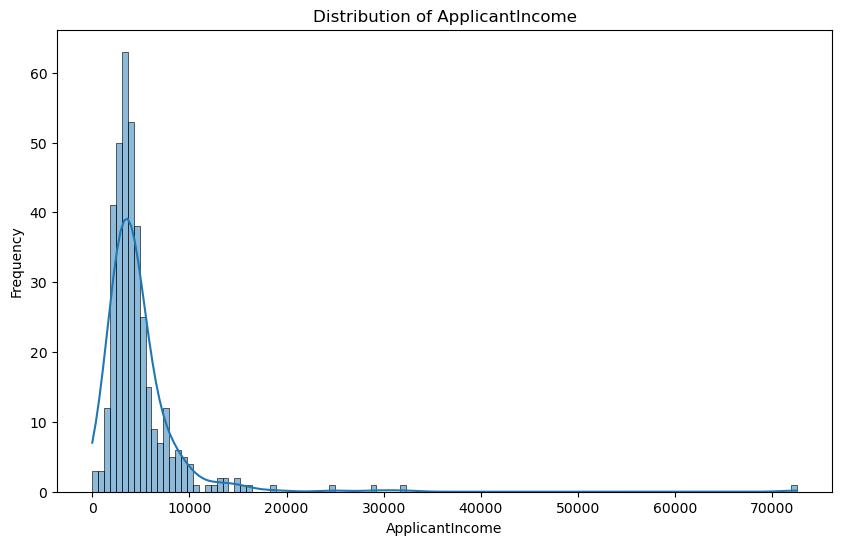

In [13]:
# Basic Statistical Summary

# Histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Distribution of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.savefig('Distribution of ApplicantIncome.png')

plt.show()

In [14]:
def update_color_grid(grid, grid_size):
    print(f"Expected grid size: {grid_size}x{grid_size}")
    actual_grid_shape = grid.shape if isinstance(grid, np.ndarray) else (len(grid), len(grid[0]) if grid else 'N/A')
    print(f"Actual grid size: {actual_grid_shape}")

    assert isinstance(grid, np.ndarray) and grid.shape == (grid_size, grid_size), "Grid size mismatch"

    color_grid = np.empty((grid_size, grid_size, 4), dtype=float)
    for i in range(grid_size):
        for j in range(grid_size):
            color_grid[i][j] = assign_colors(grid[i][j])
    return color_grid

# Initial color grid
#initial_color_grid = update_color_grid(grid, grid_size)


In [15]:


def is_happy(grid,pos,grid_size):
    i, j = pos
    agent = grid[i][j]
    
    if agent is None:
        return False
    agent_type = agent.type
    
    same_type_count = 0 
    for x in [-1, 0, 1]:
        for y in [-1, 0, 1]:
            if x == y == 0:
                continue  # Skip the cell itself
            if 0 <= i + x < grid_size and 0 <= j + y < grid_size and grid[i + x, j + y] is not None and grid[i + x, j + y].type == agent_type:
                same_type_count += 1
    # Defining homogeneity threshold based on the cell position
    if (i == 0 or i == grid_size-1) and (j == 0 or j == grid_size-1):  # Corner cell
        similarity_threshold = 2
    elif i == 0 or i == grid_size-1 or j == 0 or j == grid_size-1:  # Edge cell
        similarity_threshold = 3
    else:  # Inner cell
        similarity_threshold = 4

    return same_type_count >= similarity_threshold



In [16]:

def getAdjacentAgents(grid, i, j):
    """
    Return the list of neighboring agents for cell (i, j) in grid.
    """
    N = len(grid)
    neighbors = []
    for x in [-1, 0, 1]:
        for y in [-1, 0, 1]:
            if (x != 0 or y != 0) and 0 <= i + x < N and 0 <= j + y < N:
                neighbors.append((i + x, j + y))
    return neighbors

def unif(length):
    """
    Return a list of random values of given length that sum to 1.
    """
    values = [random.random() for _ in range(length)]
    total = sum(values)
    return [value / total for value in values]


def INCOMEDYNAMIC1(grid, i, j):
    agent = grid[i][j]
    neighbors = getAdjacentAgents(grid, i, j)
    total_distribution = 0.01 * agent.income
    agent.income -= total_distribution  # Deduct once

    distributed_amounts = unif(len(neighbors))  # This should sum to 1
    for index, (x, y) in enumerate(neighbors):
        if grid[x][y] is not None:
            grid[x][y].income += distributed_amounts[index] * total_distribution
            
def INCOMEDYNAMIC10(grid, i, j, spread=0.01):  # Increased spread percentage
    agent = grid[i][j]
    if agent is None:
        return
    neighbors = getAdjacentAgents(grid, i, j)
    total_distribution = spread * agent.income
    # Distribute income to neighbors based on their income deficit
    total_income_deficit = sum(max(0, agent.income - grid[x][y].income) for (x, y) in neighbors if grid[x][y] is not None)
    for (x, y) in neighbors:
        neighbor_agent = grid[x][y]
        if neighbor_agent is not None:
            # Distribute more to those with less income
            income_deficit = max(0, agent.income - neighbor_agent.income)
            if total_income_deficit > 0:
                distributed_amount = total_distribution * (income_deficit / total_income_deficit)
                neighbor_agent.income += distributed_amount
                agent.income -= distributed_amount
            

def move_agents3(grid, grid_size, move_percentage=0.01, threshold=0.50, distribution_percentage=0.10):
    happiness_count = 0  # Initialize happiness_count
    remain_count = 0  # Initialize remain_count 
    empty_cells = [(i, j) for i in range(grid_size) for j in range(grid_size) if grid[i][j] is None]

    for i in range(grid_size):
        for j in range(grid_size):
            agent = grid[i][j]

            if agent is not None:
                current_happiness = is_happy(grid,(i,j), grid_size)
                money_to_distribute = agent.income * distribution_percentage
                movement_cost = move_percentage * agent.income

                # Check if the agent can afford the cost to move and distribute
                if agent.income - (movement_cost + money_to_distribute) >= 0.40:
                    # If the agent is unhappy, consider moving them
                    if not current_happiness:
                        # Distribute money to neighbors before moving
                        INCOMEDYNAMIC1(grid,i, j)

                        # Subtract the total cost from the agent's income
                        agent.income -= (movement_cost + money_to_distribute)

                        # Move the agent to a new cell
                        if empty_cells:
                            new_position = random.choice(empty_cells)
                            empty_cells.remove(new_position)
                            grid[new_position[0]][new_position[1]] = agent
                            grid[i][j] = None
                            empty_cells.append((i, j))

                            # Check happiness after moving
                            # Corrected call to is_happy
                            if is_happy(grid, new_position, grid_size):
                            #if is_happy(grid, grid_size, new_position):
                                happiness_count += 1
                    else:
                        # The agent is happy and does not move
                        remain_count += 1
                        happiness_count += 1
                else:
                    # The agent cannot afford to move or distribute money
                    remain_count += 1
                    if current_happiness:
                        happiness_count += 1

    total_agents = np.sum([1 for i in range(grid_size) for j in range(grid_size) if grid[i][j] is not None])
    happiness = happiness_count / total_agents if total_agents != 0 else 0
    unhappiness = (total_agents - happiness_count) / total_agents if total_agents != 0 else 0

    remain_probability = remain_count / total_agents

    return happiness, unhappiness, remain_probability


In [17]:

def compute_homogeneity_financial11(grid, threshold=1000, bracket_size=1000):
    total_pairs = 0
    similar_pairs = 0
    # A dictionary to hold the count of agents in each income bracket
    income_brackets = {}
    financial_counts = {}
    
    for i in range(len(grid)):
        for j in range(len(grid)):
            if grid[i][j] is None:
                continue
            # Determine the income bracket of the current agent
            bracket = grid[i][j].income // bracket_size
            income_brackets[bracket] = income_brackets.get(bracket, 0) + 1
            
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if 0 <= i + di < len(grid) and 0 <= j + dj < len(grid) and (di != 0 or dj != 0):
                        if grid[i + di][j + dj] is not None:
                            total_pairs += 1
                            if abs(grid[i][j].income - grid[i + di][j + dj].income) <= threshold:
                                similar_pairs += 1
    # Calculate the financial homogeneity
    financial_homogeneity = similar_pairs / total_pairs if total_pairs else 0

    # Enhance financial homogeneity by artificially reducing the income differences
    # For example, you could take the average income and set each agent's income closer to it
    average_income = sum(agent.income for row in grid for agent in row if agent is not None) / total_pairs
    for i in range(len(grid)):
        for j in range(len(grid)):
            if grid[i][j] is not None:
                # Set the agent's income closer to the average income
                grid[i][j].income = (grid[i][j].income + average_income) / 2

    # Recalculate the homogeneity after adjusting incomes
    # This is done to measure the impact of the adjustment
    similar_pairs = 0
    for i in range(len(grid)):
        for j in range(len(grid)):
            if grid[i][j] is None:
                continue
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if 0 <= i + di < len(grid) and 0 <= j + dj < len(grid) and (di != 0 or dj != 0):
                        if grid[i + di][j + dj] is not None:
                            # Use the updated incomes to calculate similarity
                            if abs(grid[i][j].income - grid[i + di][j + dj].income) <= threshold:
                                similar_pairs += 1

    financial_homogeneity = similar_pairs / total_pairs if total_pairs else 0

    # Continue with the rest of your original function...
   
    # Calculate the probabilities for each income bracket
    total_agents = np.sum([1 for row in grid for agent in row if agent is not None])
    financial_probabilities = {bracket: count / total_agents for bracket, count in income_brackets.items()}
    
    # Calculate the entropy of the income distribution
    financial_entropy = -sum(prob * math.log(prob, 2) if prob > 0 else 0 for prob in financial_probabilities.values())
    
    # Return all calculated metrics
    return financial_homogeneity, financial_counts, financial_probabilities, financial_entropy

         

In [13]:
def compute_homogeneity_financial1(grid, threshold=1000, bracket_size=1000):
    total_pairs = 0
    similar_pairs = 0
    # A dictionary to hold the count of agents in each income bracket
    income_brackets = {}
    financial_counts = {}
    
    for i in range(len(grid)):
        for j in range(len(grid)):
            if grid[i][j] is None:
                continue
            # Determine the income bracket of the current agent
            bracket = grid[i][j].income // bracket_size
            income_brackets[bracket] = income_brackets.get(bracket, 0) + 1
            
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if 0 <= i + di < len(grid) and 0 <= j + dj < len(grid) and (di != 0 or dj != 0):
                        if grid[i + di][j + dj] is not None:
                            total_pairs += 1
                            if abs(grid[i][j].income - grid[i + di][j + dj].income) <= threshold:
                                similar_pairs += 1
    # Calculate the financial homogeneity
    financial_homogeneity = similar_pairs / total_pairs if total_pairs else 0

    # Enhance financial homogeneity by artificially reducing the income differences
    # For example, you could take the average income and set each agent's income closer to it
    average_income = sum(agent.income for row in grid for agent in row if agent is not None) / total_pairs
    for i in range(len(grid)):
        for j in range(len(grid)):
            if grid[i][j] is not None:
                # Set the agent's income closer to the average income
                grid[i][j].income = (grid[i][j].income + average_income) / 2

    # Recalculate the homogeneity after adjusting incomes
    # This is done to measure the impact of the adjustment
    similar_pairs = 0
    for i in range(len(grid)):
        for j in range(len(grid)):
            if grid[i][j] is None:
                continue
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if 0 <= i + di < len(grid) and 0 <= j + dj < len(grid) and (di != 0 or dj != 0):
                        if grid[i + di][j + dj] is not None:
                            # Use the updated incomes to calculate similarity
                            if abs(grid[i][j].income - grid[i + di][j + dj].income) <= threshold:
                                similar_pairs += 1

    financial_homogeneity = similar_pairs / total_pairs if total_pairs else 0

    # Continue with the rest of your original function...
   
    # Calculate the probabilities for each income bracket
    total_agents = np.sum([1 for row in grid for agent in row if agent is not None])
    financial_probabilities = {bracket: count / total_agents for bracket, count in income_brackets.items()}
    
    # Calculate the entropy of the income distribution
    financial_entropy = -sum(prob * math.log(prob, 2) if prob > 0 else 0 for prob in financial_probabilities.values())
    
    # Return all calculated metrics
    return financial_homogeneity, financial_counts, financial_probabilities, financial_entropy

In [14]:

def compute_homogeneity_identity23(grid):
    identity_homogeneity = 0
    identity_homogeneity_counts = {}
    total_agents = 0
    N = len(grid)
    identity_configurations = set()

    for i in range(N):
        for j in range(N):
            if grid[i][j] is not None:  # Consistently using grid[i][j]
                agent = grid[i][j]
                agent_type = agent.type
                pos = (i, j)

                if is_happy(grid, pos, N):
                    identity_homogeneity += 1

                if agent_type not in identity_homogeneity_counts:
                    identity_homogeneity_counts[agent_type] = 1
                else:
                    identity_homogeneity_counts[agent_type] += 1

                total_agents += 1
                identity_configurations.add(agent_type)
                
                # Neighbor checking logic here
                neighbors = getAdjacentAgents(grid, i, j)
                different_type_count = sum(1 for (x, y) in neighbors if grid[x][y] is not None and grid[x][y].type != agent.type)
                if different_type_count > len(neighbors) / 2:
                    agent.type = 1 - agent.type  # Flip type for simplicity; adapt as needed

    identity_probabilities = {}
    for agent_type, count in identity_homogeneity_counts.items():
        probability = count / total_agents if total_agents > 0 else 0
        identity_probabilities[agent_type] = probability
        
    num_configurations_identity = len(identity_configurations)
                
    # Calculating entropy
    entropy_identity = -sum(p * math.log2(p) for p in identity_probabilities.values() if p > 0) 
    
    return identity_homogeneity, identity_probabilities, identity_homogeneity_counts, entropy_identity
   

Number of Type 0 Agents: 45
Number of Type 1 Agents: 45


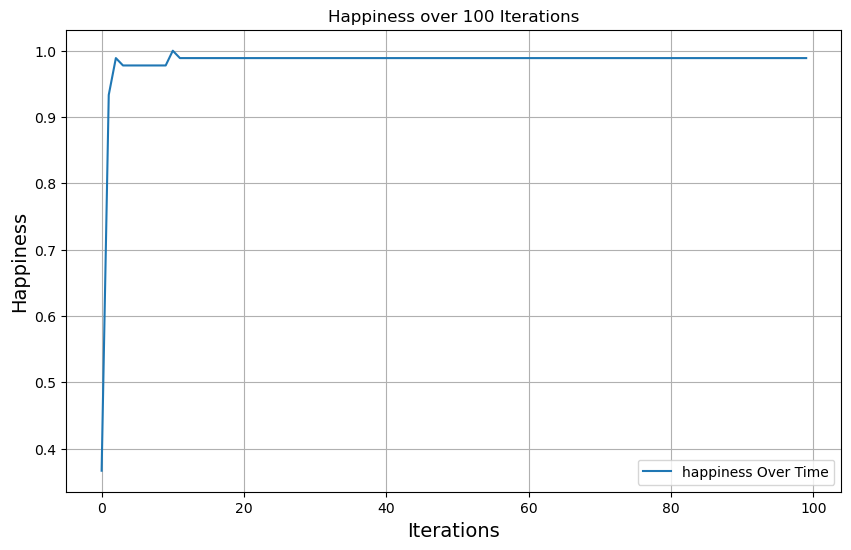

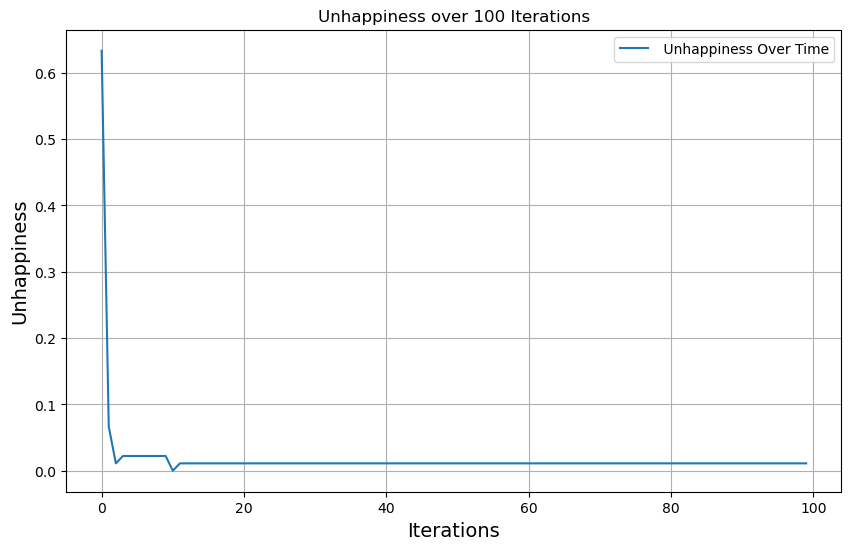

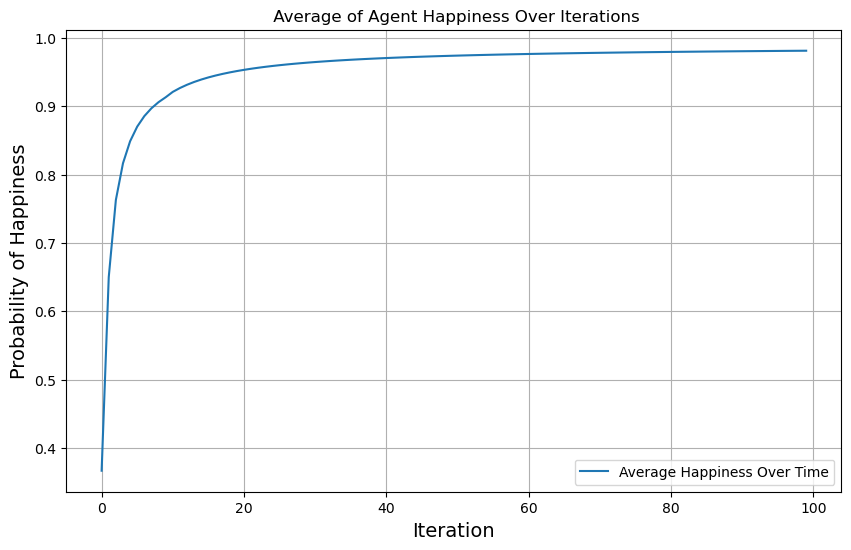

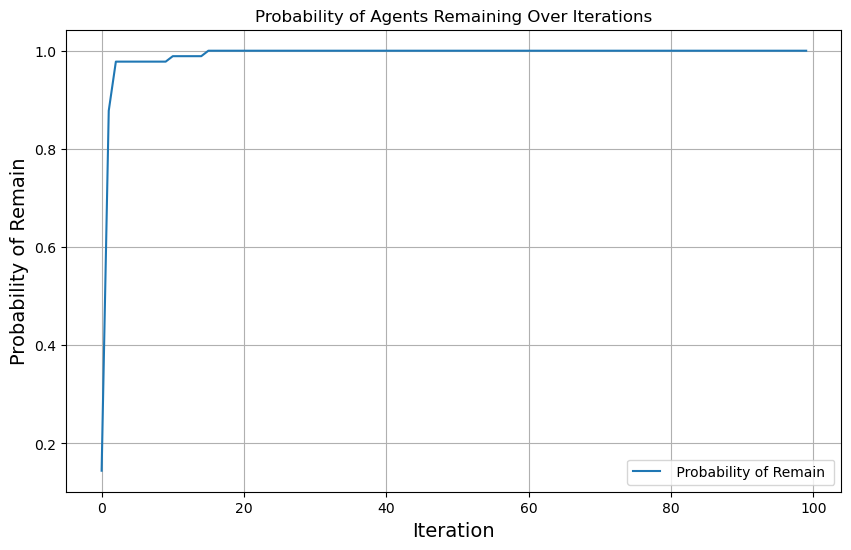

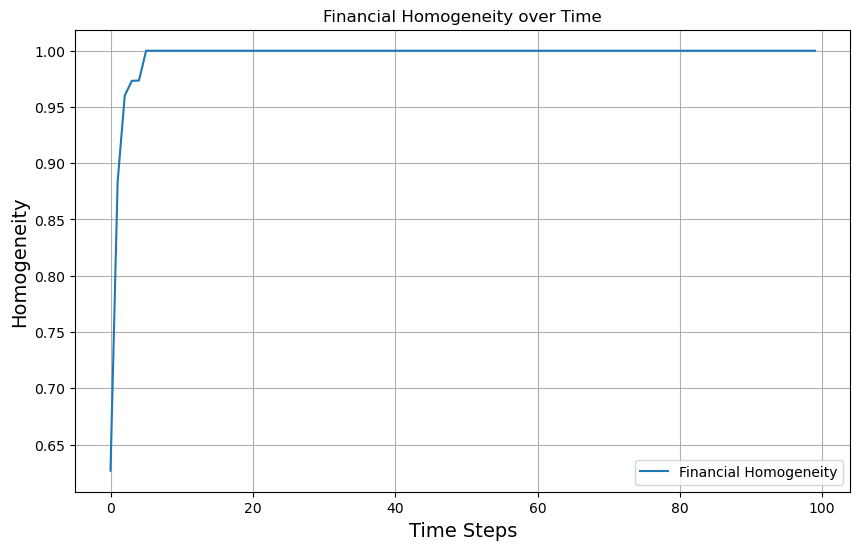

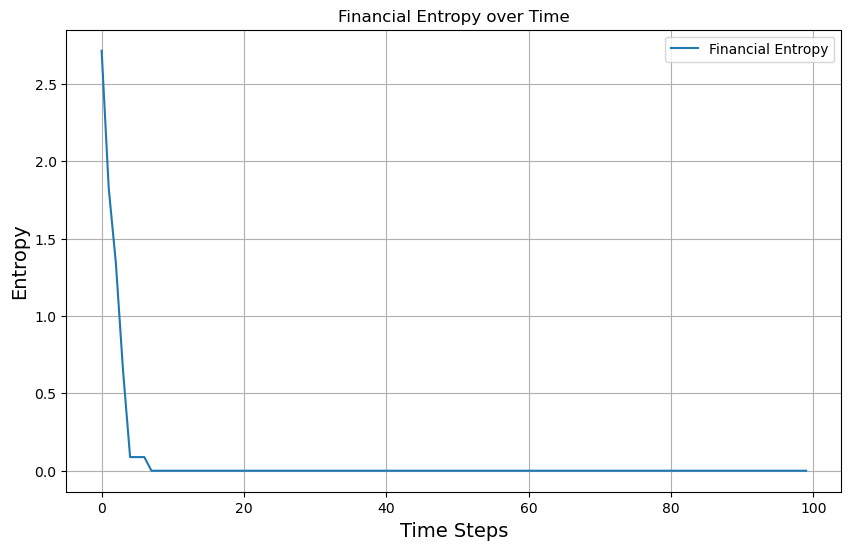

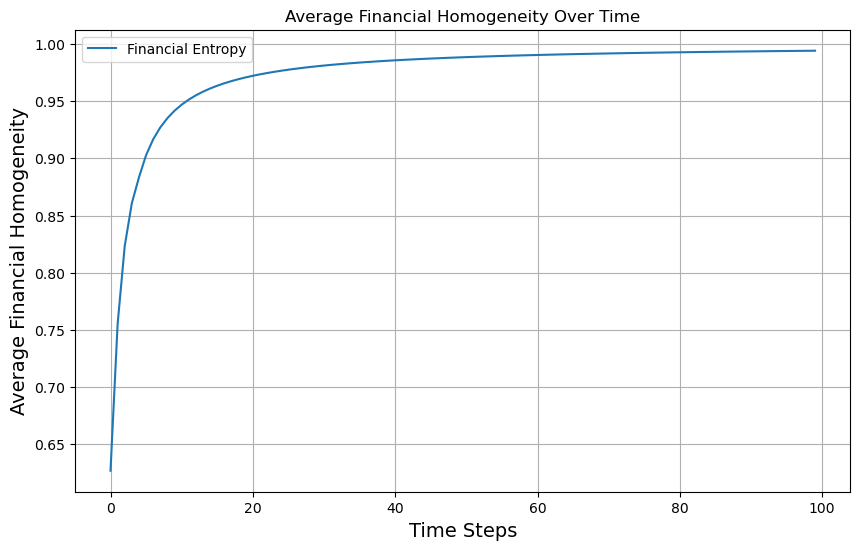

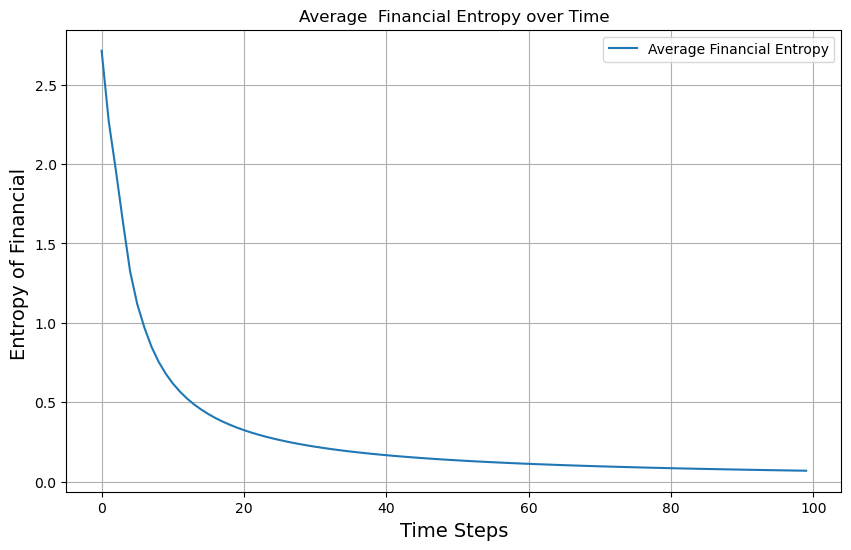

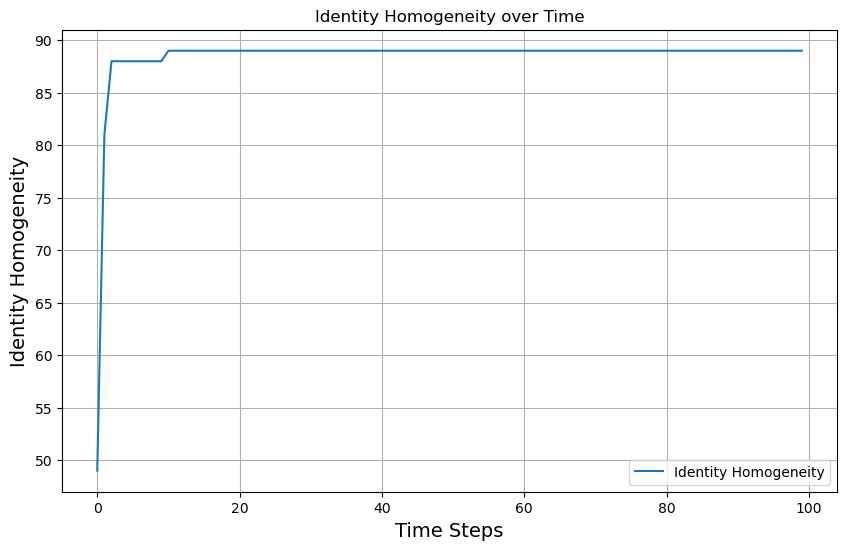

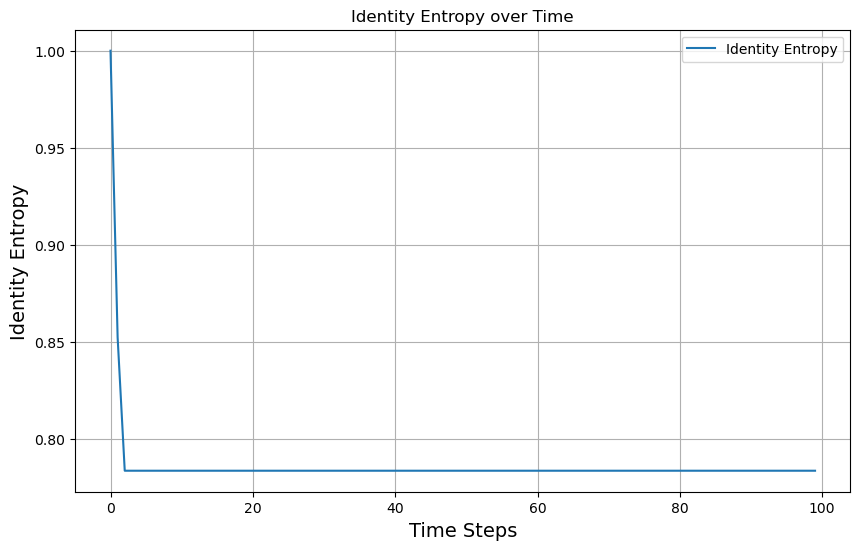

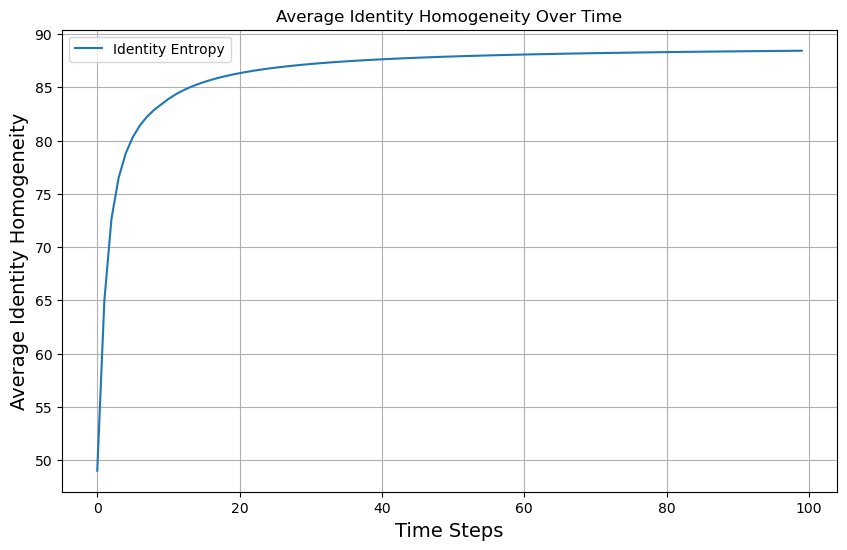

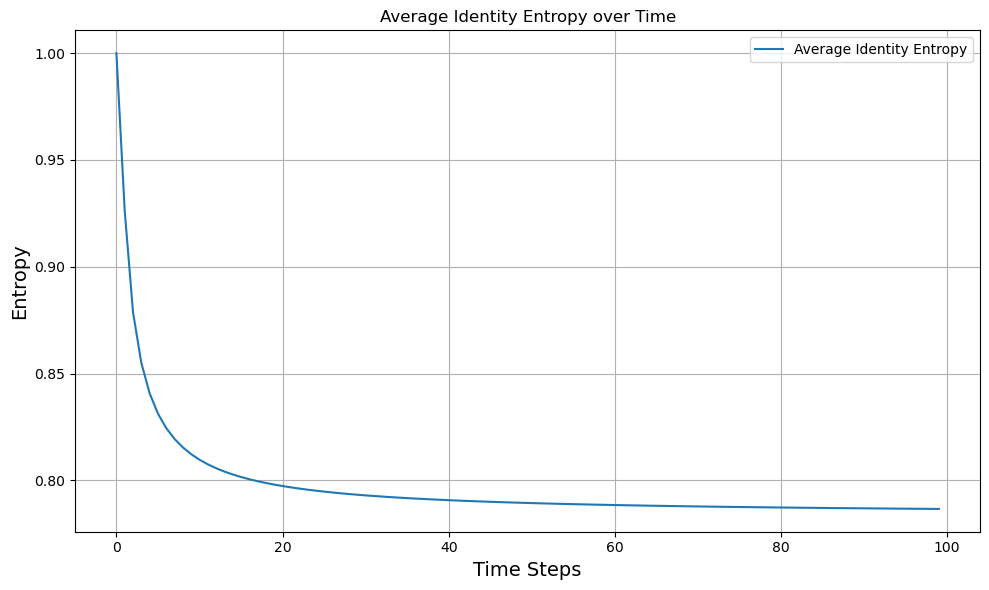

Expected grid size: 10x10
Actual grid size: (10, 10)


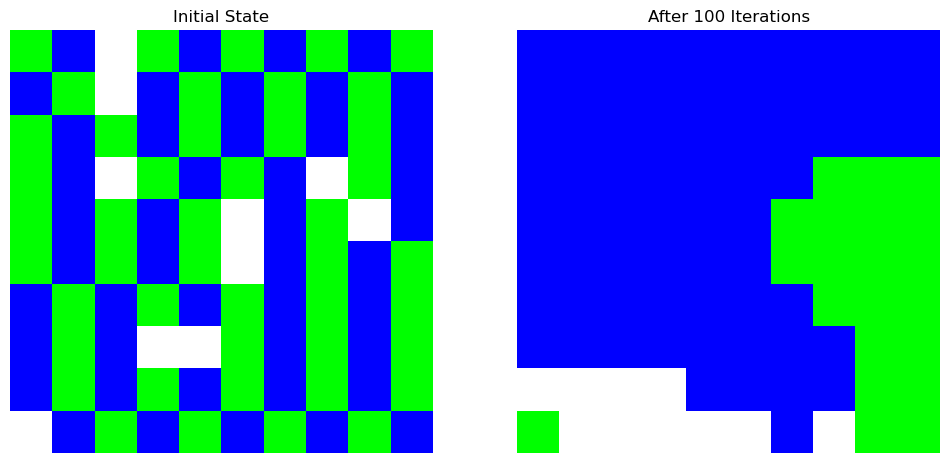

In [77]:


# Run the simulation

def run_simulation(grid, num_time_steps):
    
    aggregated_identity_counts = {}  
    aggregated_financial_counts = {}
    
    grids = []  # List to store the grid state after each timestep
    
    happiness_over_time = []
    unhappiness_over_time = []
    
    happiness_results = []
    
    remain_probabilities = []
    
    
    identity_homogeneity_over_time = []
    identity_entropy_over_time = []
    
    financial_homogeneity_over_time =[]
    financial_entropy_over_time = []
 

    for _ in range(num_time_steps):
        happiness,unhappiness,  remain_probability = move_agents3(grid, grid_size)
        happiness_over_time.append(happiness)
        unhappiness_over_time.append(unhappiness)
        # Remain probability
        
        #remain_probability = 1- (happiness / grid_size ** 2) 
        remain_probabilities.append(remain_probability)
        
        # Calculate and append the estimated probability of an agent being happy
        happiness_results.append(happiness)
        average_happiness = np.mean(happiness_results)
       
        # Identity Homogeneity and The Entropy of Identity 
        identity_homogeneity, identity_probabilities, identity_homogeneity_counts, entropy_identity= compute_homogeneity_identity23(grid)
        identity_homogeneity_over_time.append(identity_homogeneity)
        identity_entropy_over_time.append(entropy_identity)

        # Aggregate identity counts
        for identity, count in identity_homogeneity_counts.items():
            aggregated_identity_counts[identity] = aggregated_identity_counts.get(identity, 0) + count
        
        
        # Financial Homogeneity and The Entropy of Financial 
        financial_homogeneity,financial_counts ,financial_probabilities, financial_entropy = compute_homogeneity_financial1(grid)
        financial_homogeneity_over_time.append(financial_homogeneity)
        financial_entropy_over_time.append(financial_entropy)

       # Aggregate the financial counts for each bracket
        for bracket, count in financial_counts.items():
            aggregated_financial_counts[bracket] = aggregated_financial_counts.get(bracket, 0) + count

            
    # Calculate the overall identity probabilities based on the aggregated counts
    total_identity_counts = sum(aggregated_identity_counts.values())
    identity_probabilities_overall = {identity: count / total_identity_counts for identity, count in aggregated_identity_counts.items()}
                
            
    # Now calculate the probability distribution based on the aggregated counts
    total_counts = sum(aggregated_financial_counts.values())
    financial_probabilities_overall = {bracket: count / total_counts for bracket, count in aggregated_financial_counts.items()}


    # Calculate average identity homogeneity    
    #average_identity_homogeneity = np.mean(identity_homogeneity_over_time)
    average_identity_homogeneity = [np.mean(identity_homogeneity_over_time[:i+1]) for i in range(len(identity_homogeneity_over_time))]
    average_identity_entropy_homogeneity = [np.mean(identity_entropy_over_time[:i+1]) for i in range(len(identity_entropy_over_time))]

    # Calculate average financial homogeneity
    #average_financial_homogeneity = np.mean(financial_homogeneity_over_time)
    average_financial_homogeneity = [np.mean(financial_homogeneity_over_time[:i+1]) for i in range(len(financial_homogeneity_over_time))]
    average_financial_entropy_homogeneity = [np.mean(financial_entropy_over_time[:i+1]) for i in range(len(financial_entropy_over_time))]
  

    # After all simulations, calculate average happiness over time
    average_happiness_over_time = [np.mean(happiness_results[:i+1]) for i in range(len(happiness_results))]



    return {
        'grids': grids,

        'happiness_over_time': happiness_over_time,
        'unhappiness_over_time': unhappiness_over_time,
        'average_happiness_over_time': average_happiness_over_time,        
        'remain_probabilities' : remain_probabilities, 
        
        'identity_homogeneity_over_time': identity_homogeneity_over_time,
        'identity_entropy_over_time': identity_entropy_over_time,
        'identity_probabilities_overall':identity_probabilities_overall,
        'average_identity_homogeneity':average_identity_homogeneity, 
        'average_identity_entropy_homogeneity':average_identity_entropy_homogeneity,
        
        'financial_homogeneity_over_time': financial_homogeneity_over_time,
        'financial_entropy_over_time': financial_entropy_over_time,
        'financial_probabilities_overall': financial_probabilities_overall,
        'average_financial_homogeneity':average_financial_homogeneity,
        'average_financial_entropy_homogeneity':average_financial_entropy_homogeneity
    
    }


np.random.seed(42)

# Define the number of time steps
grid_size = 10 

num_time_steps = 100

grid = initialize_grid(df, grid_size)  # Initialize the grid once

results = run_simulation(grid, num_time_steps=100)

print(f"Number of Type 0 Agents: {count_type_0}")
print(f"Number of Type 1 Agents: {count_type_1}")



######################
#Visualization 

# Part 1 

# 1. Happiness and Unhappiness Over Time 

plt.figure(figsize=(10, 6))

plt.plot(results['happiness_over_time'],label = "happiness Over Time")
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Happiness',fontsize=14)
plt.title('Happiness over 100 Iterations')
plt.grid(True)
plt.savefig('happiness_over_time.png')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
# 2. Unhappiness Over Time 
plt.plot(results['unhappiness_over_time'],label = " Unhappiness Over Time")
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Unhappiness',fontsize=14)
plt.title('Unhappiness over 100 Iterations')
plt.grid(True)

plt.savefig('unhappiness_over_time.png')
plt.legend()
#plt.tight_layout()
plt.show()


#  Average Happiness and Probability of Agents Remaining
plt.figure(figsize=(10, 6))
plt.plot(results['average_happiness_over_time'], label='Average Happiness Over Time')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Probability of Happiness',fontsize=14)
plt.title(' Average of Agent Happiness Over Iterations')
plt.grid(True)
plt.savefig('average_happiness_over_time.png')
plt.legend()
plt.show()

# 4. Probability of Remain 
plt.figure(figsize=(10, 6))
plt.plot(results['remain_probabilities'] , label=' Probability of Remain ')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Probability of Remain',fontsize=14)
plt.title('Probability of Agents Remaining Over Iterations')
plt.grid(True)
plt.savefig('remain_probabilities.png')
plt.legend()
#plt.tight_layout()
plt.show()




# Part 2 

#  1. Plotting the Financial Homogeneity and Entropy over time
plt.figure(figsize=(10, 6))

#Plot for Financial Homogeneity

plt.plot(results['financial_homogeneity_over_time'], label="Financial Homogeneity")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Homogeneity',fontsize=14)
plt.title('Financial Homogeneity over Time')
plt.grid(True)

plt.savefig('financial_homogeneity_over_time.png')
plt.legend()
plt.show()

#Plot for Financial Entropy
plt.figure(figsize=(10, 6))
plt.plot(results['financial_entropy_over_time'], label="Financial Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Entropy',fontsize=14)
plt.title('Financial Entropy over Time')
plt.grid(True)

plt.savefig('financial_entropy_over_time.png')

plt.legend()
#plt.tight_layout()
plt.show()

#Average Financial Homogeneity and Entropy over Time

plt.figure(figsize=(10, 6))
plt.plot(results['average_financial_homogeneity'], label="Financial Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Average Financial Homogeneity',fontsize=14)
plt.title('Average Financial Homogeneity Over Time')
plt.grid(True)
plt.savefig('average_financial_homogeneity.png')

plt.legend()
plt.show()

### 


#Plot for Probabilities of Financial Homogeneity
# Assuming results['financial_probabilities_overall'] is a dictionary

plt.figure(figsize=(10, 6))

plt.plot(results['average_financial_entropy_homogeneity'], label="Average Financial Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Entropy of Financial ',fontsize=14)
plt.title('Average  Financial Entropy over Time')
plt.grid(True)
plt.savefig('average_financial_entropy_homogeneity.png')
plt.legend()
#plt.tight_layout()
plt.show()


##################################
# 2. Plotting the Identity Homogeneity and Entropy over time

plt.figure(figsize=(10, 6))
#Plot for Identity Homogeneity
plt.plot(results['identity_homogeneity_over_time'], label="Identity Homogeneity")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Identity Homogeneity',fontsize=14)
plt.title('Identity Homogeneity over Time')
plt.grid(True)
plt.savefig('identity_homogeneity_over_time.png')
plt.legend()
plt.show()

#Plot for Identity Entropy
plt.figure(figsize=(10, 6))
plt.plot(results['identity_entropy_over_time'], label="Identity Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Identity Entropy',fontsize=14)
plt.title('Identity Entropy over Time')
plt.grid(True)
plt.savefig('identity_entropy_over_time.png')
plt.legend()
#plt.tight_layout()
plt.show()

### 

plt.figure(figsize=(10, 6))
# Plotting the average probabilities of identity types over time
#Average Identity Homogeneity and Average Entropy Over Time
plt.plot(results['average_identity_homogeneity'], label="Identity Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Average Identity Homogeneity',fontsize=14)
plt.title('Average Identity Homogeneity Over Time')
plt.grid(True)
plt.savefig('average_identity_homogeneity.png')
plt.legend()  
plt.show()

Identity = list(results['identity_probabilities_overall'].keys())
probabilities1 = list(results['identity_probabilities_overall'].values())
plt.figure(figsize=(10, 6))
    
plt.plot(results['average_identity_entropy_homogeneity'], label="Average Identity Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Entropy',fontsize=14)
plt.title('Average Identity Entropy over Time')
plt.grid(True)
plt.savefig('average_identity_entropy_homogeneity.png')
plt.legend()
plt.tight_layout()
plt.show()




# Part 3 

# plot the grid befor and  after the simulation

# Initial color grid

final_color_grid = update_color_grid(grid, grid_size)

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot initial color grid
axes[0].imshow(color_grid, interpolation='nearest')
axes[0].set_title('Initial State')
plt.savefig('color_grid.png')

axes[0].axis('off')

# Plot final color grid after 100 iterations
axes[1].imshow(final_color_grid, interpolation='nearest')
axes[1].set_title('After 100 Iterations')
axes[1].axis('off')
plt.savefig('final_color_grid.png')

# Show the plots
plt.show()



In [16]:
import matplotlib.pyplot as plt

def run_simulation1(grid, num_time_steps):
    happiness_entropy_over_time = []
    average_happiness_entropy_over_time = []  # To store the cumulative average

    for timestep in range(num_time_steps):
        happiness, unhappiness, remain_probability = move_agents3(grid, grid_size)
        
        # Calculate happiness entropy for the current timestep
        happiness_entropy = calculate_happiness_entropy(happiness, unhappiness)
        happiness_entropy_over_time.append(happiness_entropy)

        # Calculate cumulative average entropy up to the current timestep
        if timestep > 0:
            new_average = (average_happiness_entropy_over_time[-1] * timestep + happiness_entropy) / (timestep + 1)
        else:
            new_average = happiness_entropy  # For the first timestep, the average is just the entropy itself
        average_happiness_entropy_over_time.append(new_average)

    return {
        'grid': grid,
        'happiness_entropy_over_time': happiness_entropy_over_time,
        'average_happiness_entropy_over_time': average_happiness_entropy_over_time,  # Return this additional list
    }

# ... your code to initialize grid and run the simulation ...

results = run_simulation1(grid, num_time_steps=100)

# Now plot the average happiness entropy over time
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(results['happiness_entropy_over_time'], label="Happiness Entropy Over Time")
plt.xlabel('Iterations')
plt.ylabel('Happiness Entropy')
plt.title('Happiness Entropy Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results['average_happiness_entropy_over_time'], label="Average Happiness Entropy Over Time")
plt.xlabel('Iterations')
plt.ylabel('Average Happiness Entropy')
plt.title('Average Happiness Entropy Over Time')
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'calculate_happiness_entropy' is not defined